# Fetch Dataset

## U-limb dataset
Trials are named with 3 numbers (e.g., 10_8_3), where the first number (in the example 10) indicates the participant ID, the second (8 in the example) indicates the task number, and the third is the trial number.

### EMG
    - columns are 12 measured muscles
    - rows corresponding to the time frames (sampling rate 2,000 Hz)
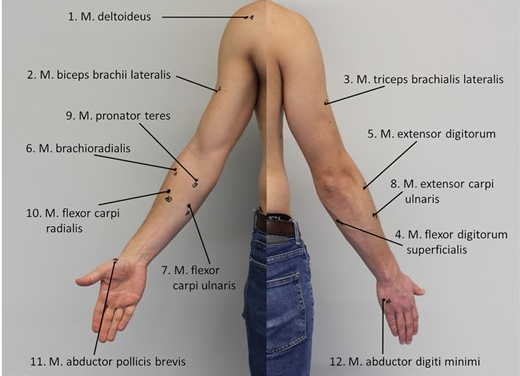
    
| Electrode No.    | Muscle                                      |
| -----------      | -----------                                 |
| 1                | M. Deltoideus pars clavicularis (DC)        |
| 2                | M. Biceps brachii (BB)                      |
| 3                | M. Triceps brachii (TB)                     |
| 4                | M. Flexor digitorum superficialis (FDS)     |
| 5                | M. Extensor digitorum (ED)                  |
| 6                | M. Brachioradialis (BR)                     |
| 7                | M. Flexor carpi ulnaris (FCU)               |
| 8                | M. Extensor carpi ulnaris (ECU)             |
| 9                | M. Pronator teres (PT)                      |
| 10               | M. Flexor carpi radialis (FCR)              |
| 11               | M. Abductor pollicis brevis (APB)           |
| 12               | M. Abductor digiti minimi (ADM)             |

### KIN
    - The table is divided in 63 columns, with 3 columns, corresponding to the x, y,z position, for each of the 21 markers;
    - The first 2 rows contain, respectively, the marker names and the measure unit (in millimeters).
    - the rows, starting from the third one, report the recorded marker position for each time frame (sampling rate of 200 Hz).

    
### EMG signals(mV): 
In the EMG signal, a 50 Hz notch filter removes
city noise and a 10 Hz high pass filter removes motion effects and
DC offsets. Also, a 250 Hz low pass filter for adverse effects with
a minimum order and stop damping is used. Pattern recognition is based on time and frequency. The most common segmentation for EMG pattern recognition is based on time.


### IMU: 
IMU sensor or inertial measurement
unit is a set of accelerometer sensors, and Gyroscope in three x-y-z
axes is used to measure the linear speed of movement and body angle

### Free Spectral Range - FSR ():
Five FSR sensors are used in the medial, middle, lateral meta-tarsal,
lateral arch, and heel areas of the sole to calculate the reaction forces
between the feet and the ground.

### Load cell (kg?):
mall beam-type load cells
measure the interaction forces between the user and the robot joints.
The capacity of the built-in load cells in the joints is 7 kg. 

## Features in neural network

There are 80 features in this work, which are 5 FSR * 2 legs + 3
Axis * 2 Angular and Angular velocity + 4 Sensor EMG * 16 Features,
respectively. These features are then arranged in a 9 x 9 matrix for
the directed acyclic graph (DAG) network input.


In [ ]:
import pandas as pd
EMG_PATH = 'dataset/EMG/healthy'
emg = pd.read_csv(f'{EMG_PATH}/1_1_3.csv')

# Patch first column
first_row = pd.DataFrame({'elec_1': 0.0035095, 'elec_2': 0.0036621, 'elec_3': 0.0028992, 'elec_4': 0.0041199, 'elec_5': 0.0038147, 'elec_6': 0.0041199, 'elec_7': 0.0041199, 'elec_8': 0.0015259, 'elec_9': 1.5737, 'elec_10': 0.028381, 'elec_11': 9.1631e-05, 'elec_12': 3.8428e-05}, index=[0])

emg = emg.rename(columns={'0.0035095': 'elec_1', '0.0036621': 'elec_2','0.0028992': 'elec_3', '0.0041199': 'elec_4','0.0038147': 'elec_5', '0.0041199.1': 'elec_6','0.0041199.2': 'elec_7', '0.0015259': 'elec_8','1.5737': 'elec_9', '0.028381': 'elec_10','9.1631e-05': 'elec_11', '3.8428e-05': 'elec_12'})
emg = pd.concat([first_row,emg.loc[:]]).reset_index(drop=True)

